In [1]:
import matplotlib
from matplotlib.pyplot import *
from numpy import *
import pylab as plt

1.498243165370492
-1.3696107106651159
1.8771032676347037


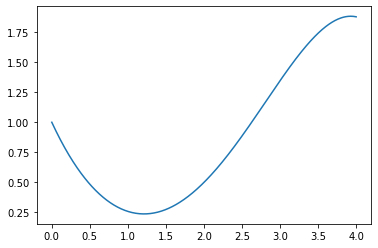

In [39]:
def rungekutta(alpha,a,b,N,F):
    h = (b-a)/N
    ys = zeros([N+1,alpha.size])
    ys[0] = alpha
    xs = arange(a,b+h,h)
    for i in range(N):
        ys[i+1] = ys[i] + h/2*(F(a + i*h, ys[i]) + F(a + i*h + h, ys[i]+h*F(a + i*h, ys[i])))
    return xs,ys

def Fnthorder(x,yvec):
    res = zeros(yvec.size)
    for i in range(yvec.size-1):
        res[i] = yvec[i+1]
    res[yvec.size-1] = f(x,yvec)
    return res

def secant(f,x0,xm1):
    xs=[xm1,x0]
    for i in range(3): #be careful can give an error if too many iterations
        xs.append( (xs[-1]*f(xs[-2])-xs[-2]*f(xs[-1])) / (f(xs[-2])-f(xs[-1])) )
    return xs

#Given
a=0
b=2
c=4
alpha=1
beta=0.5
gamma=0.7

def f(x,yvec):
    return -yvec[0]

 # solving for y(b) = beta

print(u1sol)

def GG(u2):
    def G(u1):
        xs,ys = rungekutta(array([alpha,u1]),a,b,500,Fnthorder)
        return ys[-1,0] - beta 
    u1sol = secant(G,0,1)[-1]
    print(u1sol)
    xs,ys = rungekutta(array([alpha,u1sol,u2]),a,c,500,Fnthorder)
    return ys[-1,0] - gamma  # ys[n,i] where n indentifies the position, and i identifies y or y'
u2sol = secant(G,0,1)[-1] # solving for y(b) = beta

def G(u1):
    xs,ys = rungekutta(array([alpha,u1,u2sol]),a,b,500,Fnthorder)
    return ys[-1,0] - beta 
    # ys[n,i] where n indentifies the position, and i identifies y or y'
u1sol = secant(G,0,1)[-1] # solving for y(b) = beta
print(u1sol)
xs,ys = rungekutta(array([alpha,u1sol,u2sol]),a,c,500,Fnthorder)

print(ys[-1,0])

plt.plot(xs,ys[:,0])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


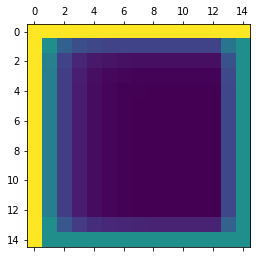

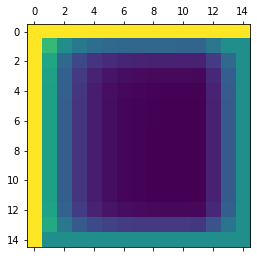

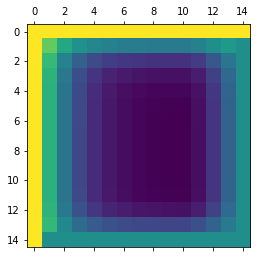

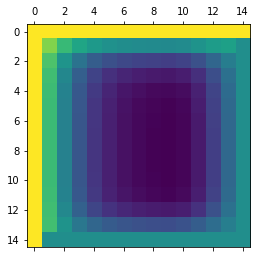

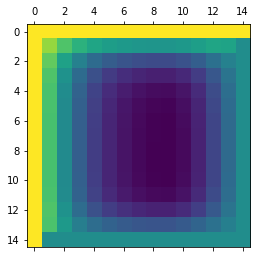

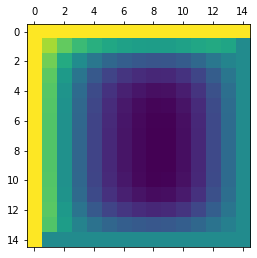

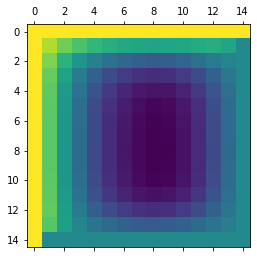

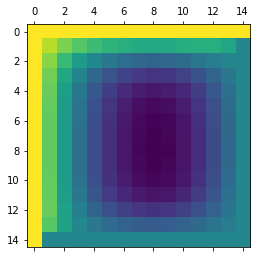

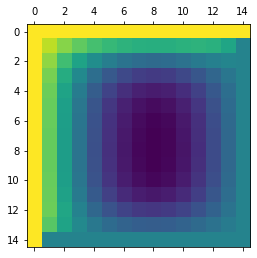

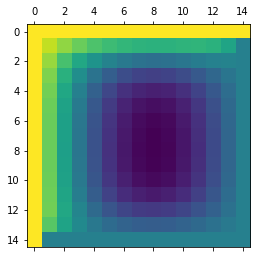

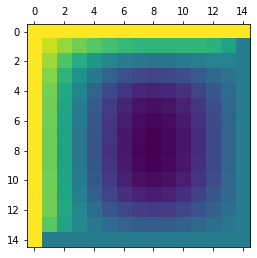

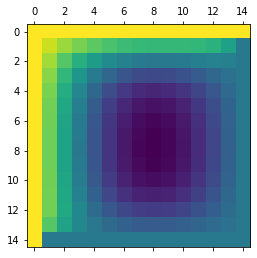

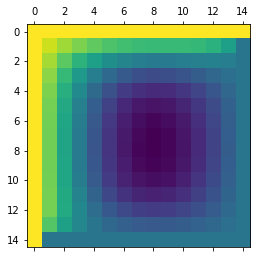

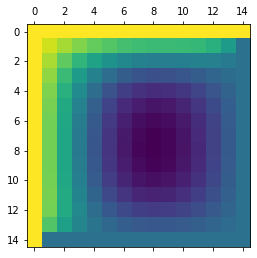

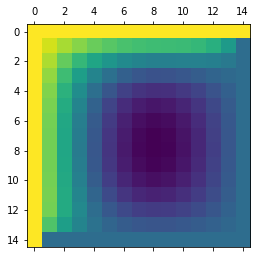

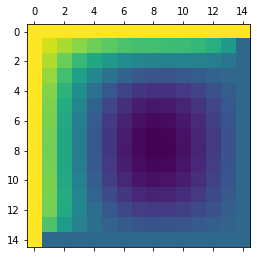

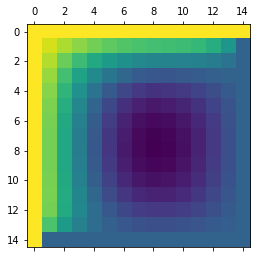

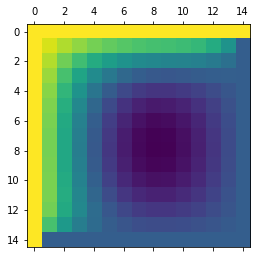

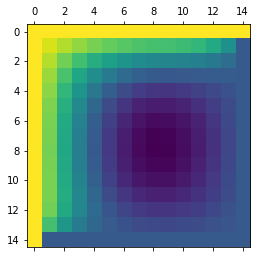

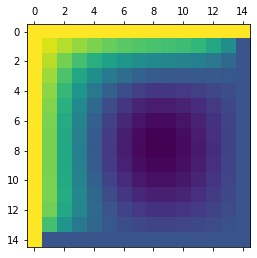

In [55]:
sizex = 15
sizey = 15
def relaxation(init): #Take average of sorrounding values without extremities
    res = init[:]
    for x in range(1,sizex-1):
        for y in range(1,sizey-1):
            res[x,y] = (init[x-1,y]+init[x+1,y]+3*init[x,y-1]+3*init[x,y+1])/8
    return res

solution = array([[1.]*sizey]*sizex) # this initial value does not matter
print(solution)
for i in range(15):
    solution[0,i]=solution[i,0]=3
    #print(solution)
    solution[i,14]=solution[14,i]=2
    # here we put the right boundary conditions

for i in range(20):
    solution = relaxation(solution)
    plt.matshow(solution)
    # 20-step interation

In [46]:
from numpy import *

def stochastic(T):
    dt=0.001
    ts = arange(0,T,dt)
    N = ts.size
    xs = zeros(N)
    sdt= sqrt(1*dt)
    for i in arange(1,N):
        xs[i]=xs[i-1]+ xs[i-1]**2*dt+ts[i-1]*random.normal(0,sdt)
    # put the right code here
    return ts,xs

ts,xs = stochastic(1) # use your function here
print(stochastic(1))

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127

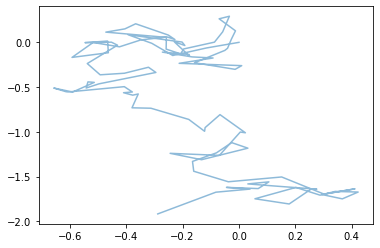

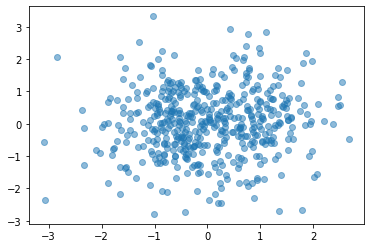

In [25]:
def stochastic(T,sigma): #a(x)=0, b(x)=sigma
    dt=0.01
    ts = arange(0,T,dt)#Does not include T
    N = ts.size
    xs1 = zeros(N)
    xs2=zeros(N)
    xs1[0]=0
    xs2[0]=0
    sdt = sqrt(dt) #standard deviation
    for i in range(1,N):
        xs1[i] = xs1[i-1] + sigma*sdt*random.normal()
        xs2[i]=xs2[i-1]+sigma*sdt*random.normal()
    return xs1,xs2
xs1,xs2 = stochastic(1,1)
plot(xs1,xs2,alpha=0.5)
show()
ys1=[]
ys2=[]
for i in range(500):
    xs1,xs2 = stochastic(1,1)
    ys1.append(xs1[-1])
    ys2.append(xs2[-1])
    #plt.plot(ts,xs,"b")
plot(ys1,ys2,"o",alpha=0.5)
show()
#Check that last value x[-1] follows N(0,T)
